In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import sklearn.metrics as metrics
from sklearn.metrics import jaccard_score,f1_score,r2_score,log_loss
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [3]:
df = pd.read_csv(r"E:\ML Internship\CustChurn\Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df = df.drop("RowNumber",axis=1)

In [5]:
df = df.drop("CustomerId", axis=1)

In [6]:
df = df.drop("Surname",axis=1)

In [7]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [10]:
df["Geography"] = df["Geography"].replace(['France', 'Spain', 'Germany'],[0,1,2])
df["Gender"] = df["Gender"].replace(['Female', 'Male'],[0,1])

In [11]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0


<AxesSubplot: xlabel='Gender', ylabel='count'>

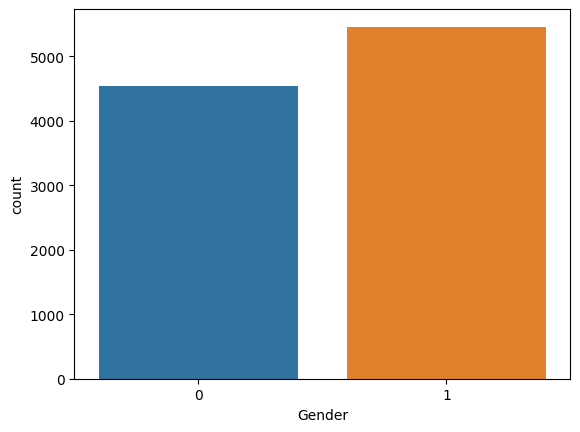

In [12]:
sns.countplot(x="Gender", data=df)

<AxesSubplot: xlabel='Exited', ylabel='count'>

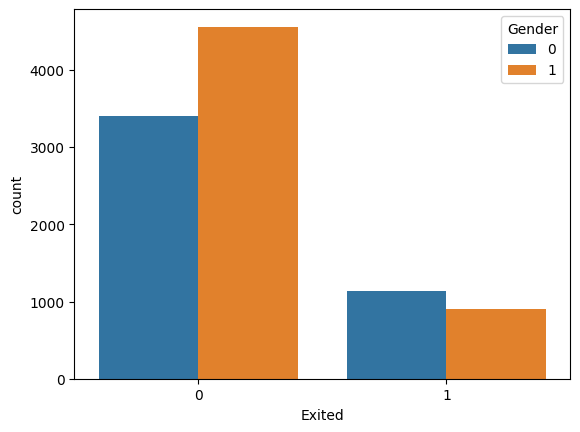

In [13]:
sns.countplot(x="Exited", hue="Gender",data=df)

In [14]:
features = df.drop("Exited", axis=1)
Y = df["Exited"]

In [61]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=4)


logreg_model = LogisticRegression()
logreg_model.fit(x_train, y_train)
logreg_pred = logreg_model.predict(x_test)
logreg_proba = logreg_model.predict_proba(x_test)


xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)
xgb_pred = xgb_model.predict(x_test)
xgb_proba = xgb_model.predict_proba(x_test)


rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)
rf_proba = rf_model.predict_proba(x_test)


models = {
    "Logistic Regression": (logreg_pred, logreg_proba),
    "XGBoost": (xgb_pred, xgb_proba),
    "Random Forest": (rf_pred, rf_proba)
}

for name, (pred, proba) in models.items():
    acc = accuracy_score(y_test, pred)
    jaccard = jaccard_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    loss = log_loss(y_test, proba)
    print(f"{name}:")
    print(f"Accuracy: {acc:.4f}, Jaccard Index: {jaccard:.4f}, F1 Score: {f1:.4f}, Log Loss: {loss:.4f}")



Logistic Regression:
Accuracy: 0.7990, Jaccard Index: 0.0607, F1 Score: 0.1145, Log Loss: 0.4671
XGBoost:
Accuracy: 0.8600, Jaccard Index: 0.4239, F1 Score: 0.5954, Log Loss: 0.3539
Random Forest:
Accuracy: 0.8735, Jaccard Index: 0.4427, F1 Score: 0.6137, Log Loss: 0.3967
